# Analysing Global Protests since 1990

## Introduction
This project will explore the Global Protests from 1990 to March 2020 dataset, available on Kaggle, which provides a comprehensive view of global protest activity over three decades. This dataset aggregates information from three distinct datasets, offering a rich, multidimensional perspective on mass mobilization, socio-political conditions, and human development. The dataset is a valuable resource for analyzing trends, identifying patterns, and exploring correlations between protests and various socio-economic and political factors.

## Description of the data points
******
### Mass Mobilization Dataset

Focus: Tracks protest events globally, capturing information about the type of protests, their scale, and their outcomes.

Features include:
Dates and locations of protests.
Types of demands made by protesters (e.g., economic, political, social).
Government responses to protests.

### V-Dem Dataset (Varieties of Democracy)

Focus: Measures the quality and characteristics of democracy across countries.
Features include:
Indicators of democratic governance (e.g., electoral integrity, civil liberties).
Political participation and freedom of expression.
Trends in authoritarian practices.

### Human Development Index (HDI) Dataset

Focus: Captures socio-economic development metrics across nations, with the key metric here being the HDI score.


To begin, we'll start by importing our relevant libraries, and reading in our data from csv.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path = "data/massmobilisation.csv"
df = pd.read_csv(path)

print(df.head())
print (df.columns)


          id country  ccode  year         region  protest  protestnumber  \
0  201990001  Canada     20  1990  North America        1              1   
1  201990002  Canada     20  1990  North America        1              2   
2  201990003  Canada     20  1990  North America        1              3   
3  201990004  Canada     20  1990  North America        1              4   
4  201990005  Canada     20  1990  North America        1              5   

   startday  startmonth  startyear  endday  endmonth  endyear  \
0      15.0         1.0     1990.0    15.0       1.0   1990.0   
1      25.0         6.0     1990.0    25.0       6.0   1990.0   
2       1.0         7.0     1990.0     1.0       7.0   1990.0   
3      12.0         7.0     1990.0     6.0       9.0   1990.0   
4      14.0         8.0     1990.0    15.0       8.0   1990.0   

   protesterviolence          location participants_category participants  \
0                0.0          national                   NaN        1000s  

Let's start by looking at global protest frequency on a yearly basis.

    year  num_protests
0   1990           630
1   1991           436
2   1992           475
3   1993           390
4   1994           457
5   1995           425
6   1996           472
7   1997           546
8   1998           511
9   1999           481
10  2000           537
11  2001           455
12  2002           477
13  2003           452
14  2004           498
15  2005           551
16  2006           525
17  2007           504
18  2008           460
19  2009           439
20  2010           510
21  2011           739
22  2012           604
23  2013           636
24  2014           830
25  2015           920
26  2016           766
27  2017           601
28  2018           745
29  2019           866
30  2020           207


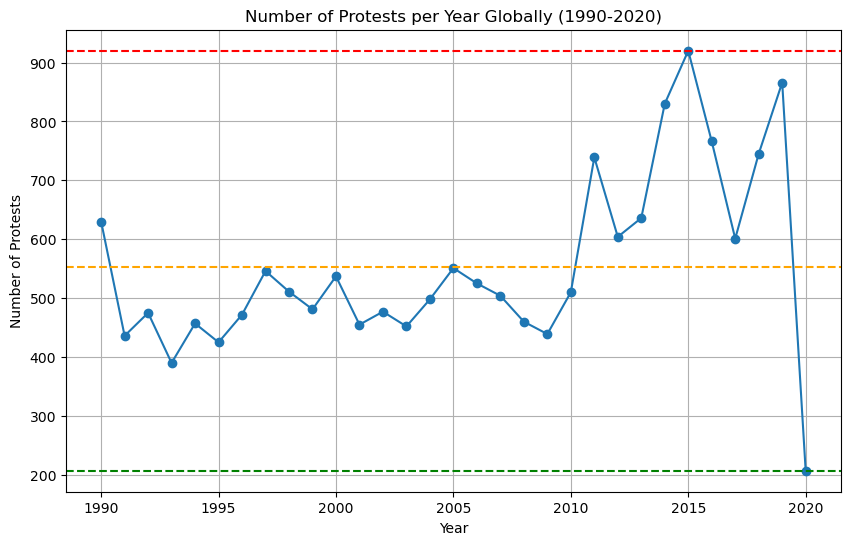

In [37]:
# Group by 'Year'
yeargrouped = df.groupby('year')

# Count the number of protests for each year
protests_per_year = yeargrouped.size().reset_index(name='num_protests')

print(protests_per_year)

# Calculate average, min, and max
average = protests_per_year['num_protests'].mean()
minimum = protests_per_year['num_protests'].min()
maximum = protests_per_year['num_protests'].max()


# Plot protests per year
plt.figure(figsize=(10, 6))
plt.plot(protests_per_year['year'], protests_per_year['num_protests'], marker='o')
plt.title('Number of Protests per Year Globally (1990-2020)')
plt.xlabel('Year')

plt.ylabel('Number of Protests')
# Add average, min, and max lines
plt.axhline(y=average, color='orange', linestyle='--', label=f'Average: {average:.2f}')
plt.axhline(y=minimum, color='green', linestyle='--', label=f'Min: {minimum}')
plt.axhline(y=maximum, color='red', linestyle='--', label=f'Max: {maximum}')

plt.grid()
plt.show()



As you can see from the plot above, the number of yearly protests in the 90s and 00s stayed relatively constant, before a large spike in the 2010s, aligning with the Arab Spring movement and the increase of climate-related protests in the West.

            region  num_protests
0           Africa          3790
1             Asia          3448
2  Central America           503
3           Europe          5469
4             MENA          1585
5    North America           587
6          Oceania            50
7    South America          1713


/var/folders/83/p7dxgbn55cn997y66h_vgrr00000gn/T/ipykernel_1900/3529794420.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


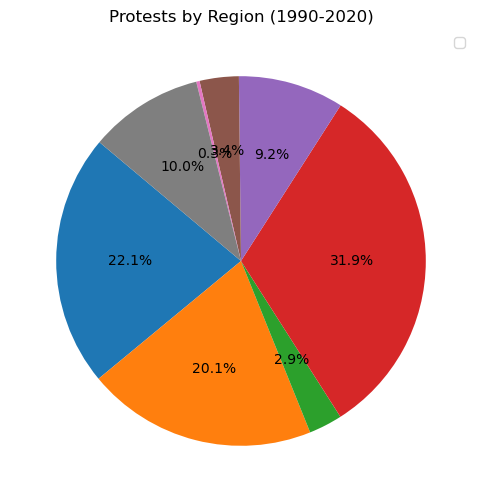

In [48]:
regiongrouped = df.groupby('region')
protests_per_region = regiongrouped.size().reset_index(name='num_protests')
print(protests_per_region)

plt.figure(figsize=(10, 6))
plt.pie(
    protests_per_region['num_protests'], 
    autopct='%1.1f%%',  # Display percentage with 1 decimal place
    startangle=140  # Rotate the pie chart for better appearance
)
plt.title('Protests by Region (1990-2020)')
plt.legend()
plt.show()
